<a href="https://colab.research.google.com/github/landge66/success-startup-prediction/blob/main/success_startup_prediction9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
startup_data = pd.read_csv("/startup_data.csv")

In [ ]:
startup_data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
startup_data.shape

(923, 49)

In [ ]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
startup_data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
# Select only numeric columns
numeric_columns = startup_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_matrix = numeric_columns.corr()


In [ ]:
startup_data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [ ]:
# Drop the irrelevant features
columns_to_drop = ['state_code', 'latitude', 'longitude', 'id', 'Unnamed: 6', 'state_code.1', 'zip_code', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'object_id', 'name']

# Drop columns
startup_data.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
# Checking if there are null values or not

startup_data.isnull().sum()

Unnamed: 0                    0
city                          0
labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roun

In [ ]:
# Filling null values

startup_data['age_first_milestone_year'] = startup_data['age_first_milestone_year'].fillna(startup_data['age_first_milestone_year'].mean())
startup_data['age_last_milestone_year'] = startup_data['age_last_milestone_year'].fillna(startup_data['age_last_milestone_year'].mean())

In [ ]:
# Data after filling null values:

startup_data.isnull().sum()

Unnamed: 0                  0
city                        0
labels                      0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_partic

In [ ]:
# Taget variable is object so converting it into int:

encoder=LabelEncoder()

In [ ]:
startup_data['status']= encoder.fit_transform(startup_data['status'])
startup_data

,Unnamed: 0,city,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,San Diego,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,1,0,1,0,0,0,0,1.0000,0,0
1,204,Los Gatos,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,1,0,0,1,1,1,4.7500,1,0
2,1001,San Diego,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,0,0,1,0,0,0,4.0000,1,0
3,738,Cupertino,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,0,0,1,1,1,3.3333,1,0
4,1002,San Francisco,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,0,1,1,0,0,0,0,1.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,San Francisco,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,0,0,0,1,0,0,0,6.0000,1,0
919,721,Burlington,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,...,1,1,0,0,1,0,0,2.6667,1,1
920,557,Sunnyvale,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,...,0,0,0,0,0,0,1,8.0000,1,1
921,589,San Francisco,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,0,0,0,1,1,0,0,1.0000,1,0


In [ ]:
# sample for acquired and closed

startup_data['status'].value_counts()

status
0    597
1    326
Name: count, dtype: int64

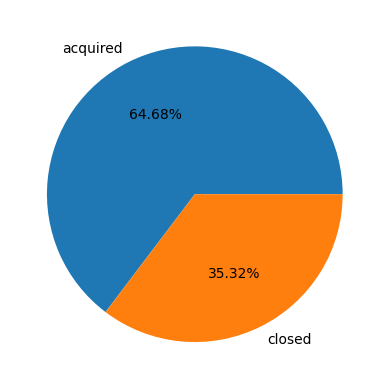

In [ ]:
plt.pie(startup_data['status'].value_counts(), labels=['acquired','closed'], autopct='%2.2f%%')
plt.show()

In [ ]:
# Top 10 cities for startup

startup_data['city'].value_counts().head(10)

city
San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Santa Clara       27
Austin            27
San Mateo         26
Seattle           26
Sunnyvale         22
San Jose          18
Name: count, dtype: int64

In [ ]:
# Top 10 startup industries:

startup_data['category_code'].value_counts().head(10)

category_code
software           153
web                144
mobile              79
enterprise          73
advertising         62
games_video         52
semiconductor       35
network_hosting     34
biotech             34
hardware            27
Name: count, dtype: int64

In [ ]:
# Graph of funding_total_usd Vs category_code

fig=px.bar(startup_data,x=startup_data['category_code'],y=startup_data['funding_total_usd'],title="Total funding VS Category",color='category_code')
fig.show()

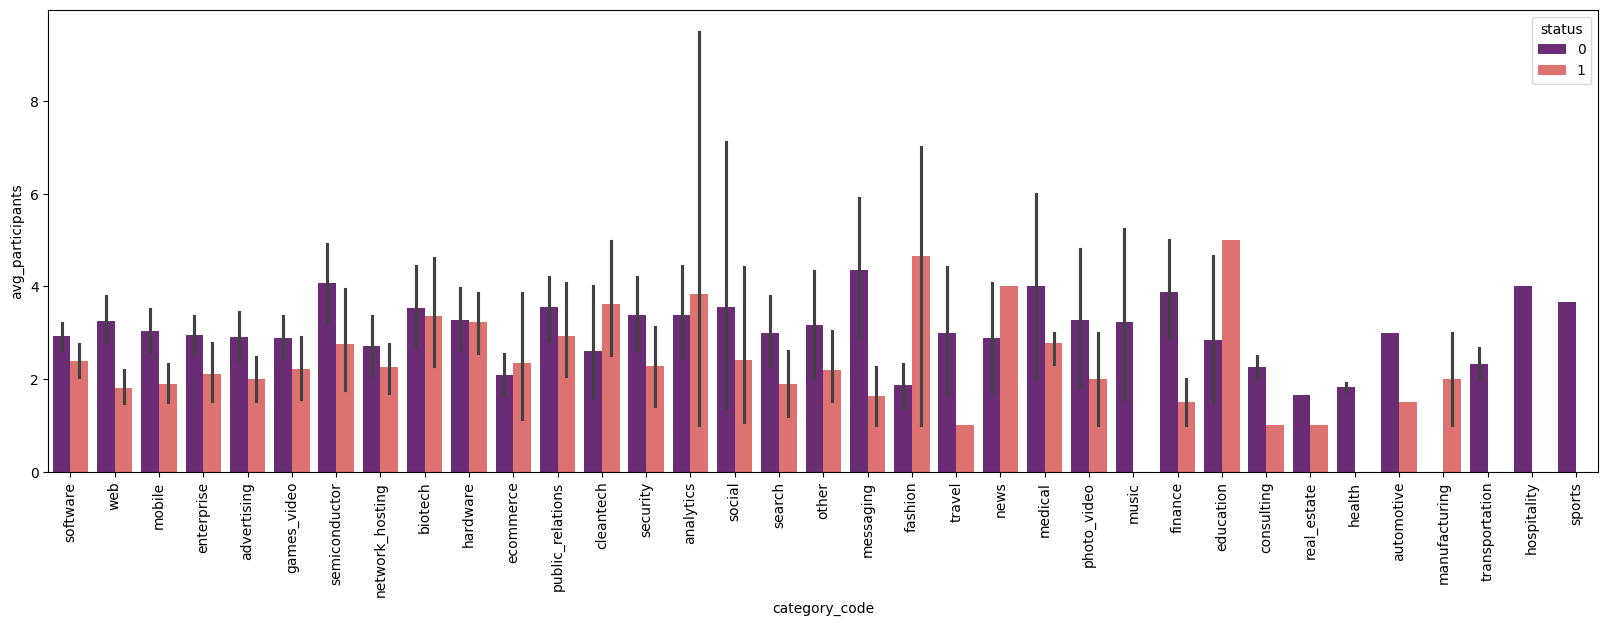

In [ ]:
# Graph of avg_participants Vs category_code

fig, ax = plt.subplots(figsize=(20,6))

startup_category= sns.barplot(x="category_code", y='avg_participants', hue="status", data=startup_data, palette="magma",
              order=startup_data.category_code.value_counts().index)

startup_category = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   city                      923 non-null    object 
 2   labels                    923 non-null    int64  
 3   age_first_funding_year    923 non-null    float64
 4   age_last_funding_year     923 non-null    float64
 5   age_first_milestone_year  923 non-null    float64
 6   age_last_milestone_year   923 non-null    float64
 7   relationships             923 non-null    int64  
 8   funding_rounds            923 non-null    int64  
 9   funding_total_usd         923 non-null    int64  
 10  milestones                923 non-null    int64  
 11  is_CA                     923 non-null    int64  
 12  is_NY                     923 non-null    int64  
 13  is_MA                     923 non-null    int64  
 14  is_TX     

In [ ]:
#creating dummy variables for the categorical features
startup_data['city']= encoder.fit_transform(startup_data['city'])
startup_data['category_code']= encoder.fit_transform(startup_data['category_code'])

separating the Dataset


In [ ]:
x=startup_data.drop('status', axis=1)
y=startup_data['status']

Splitting the dataset into training and test data


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Implementation of Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

# prediction
y_pred_lr = lr.predict(x_test)

print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_lr))

Accuracy of the test set:  0.6594594594594595


In [ ]:
# implemenetation of KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

# prediction
y_pred_knn = knn.predict(x_test)

print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_knn))



Accuracy of the test set:  0.6594594594594595


In [ ]:
# Implementation of Decision Tree:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(criterion='entropy', random_state=20)

#tree = DecisionTreeClassifier(random_state=23)
tree.fit(x_train, y_train)

# prediction
y_pred_tr = tree.predict(x_test)

print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_tr))

Accuracy of the test set:  1.0


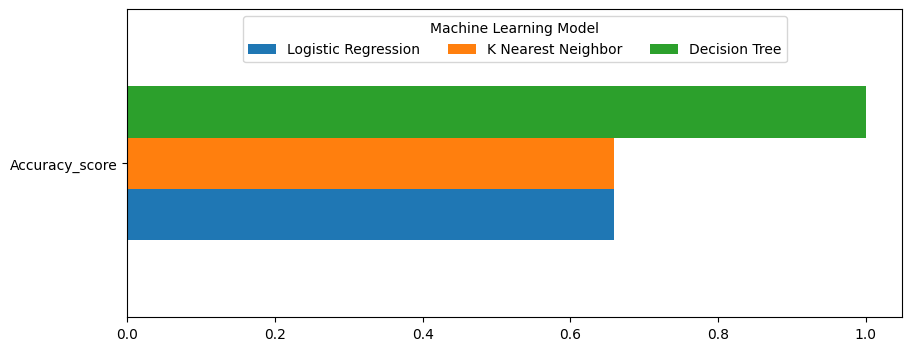

In [ ]:
# Gathering accuracy score for each model

Accuracy_score = { 'Logistic Regression': { 'Accuracy_score':  accuracy_score(y_test, y_pred_lr)},
                   'K Nearest Neighbor': {'Accuracy_score':  accuracy_score(y_test, y_pred_knn)},
                   'Decision Tree': {'Accuracy_score': accuracy_score(y_test, y_pred_tr)}}

# Plotting comparsion of each model
Accuracy_score = pd.DataFrame(Accuracy_score)
Accuracy_score.plot(kind="barh",figsize=(10,4)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



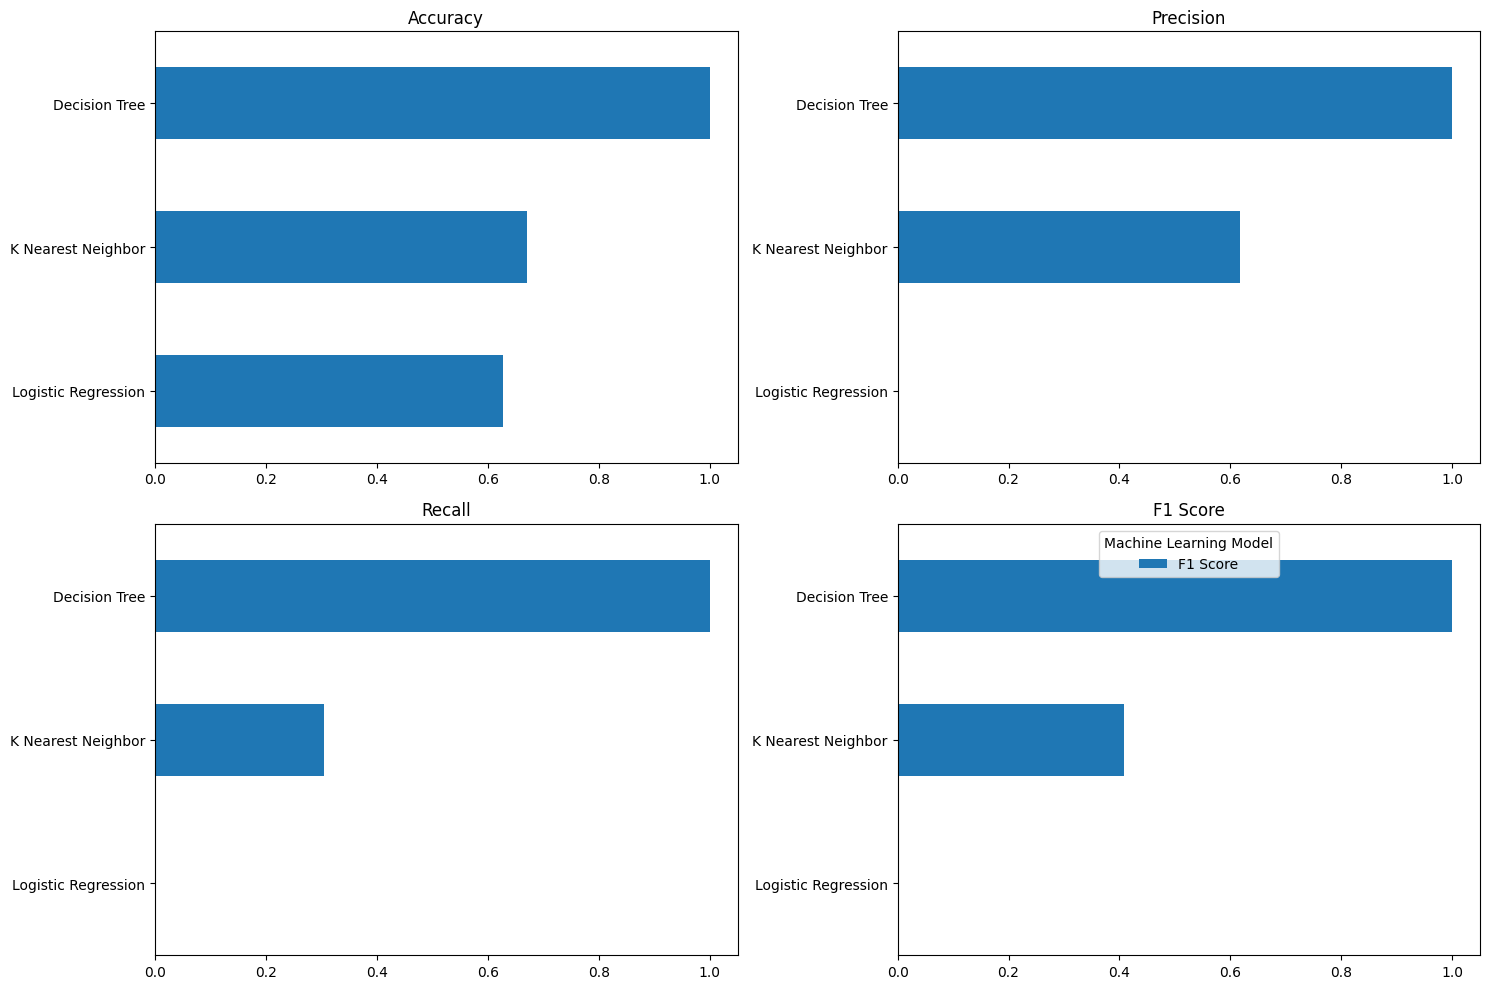

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
import pickle

# Load the data
startup_data = pd.read_csv('/startup_data.csv')

# Preprocess the data
numeric_columns = startup_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

columns_to_drop = ['state_code', 'latitude', 'longitude', 'id', 'Unnamed: 6', 'state_code.1', 'zip_code', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'object_id', 'name']
startup_data.drop(columns_to_drop, axis=1, inplace=True)

mean_age_first_milestone = startup_data['age_first_milestone_year'].mean()
startup_data['age_first_milestone_year'] = startup_data['age_first_milestone_year'].fillna(mean_age_first_milestone)

mean_age_last_milestone = startup_data['age_last_milestone_year'].mean()
startup_data['age_last_milestone_year'] = startup_data['age_last_milestone_year'].fillna(mean_age_last_milestone)

encoder = LabelEncoder()
startup_data['status'] = encoder.fit_transform(startup_data['status'])

# Transform 'city' and 'category_code' columns into numerical representations
startup_data['city'] = encoder.fit_transform(startup_data['city'])
startup_data['category_code'] = encoder.fit_transform(startup_data['category_code'])

x = startup_data.drop('status', axis=1)
y = startup_data['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=20)
tree.fit(x_train, y_train)
y_pred_tr = tree.predict(x_test)
accuracy_tr = accuracy_score(y_test, y_pred_tr)
precision_tr = precision_score(y_test, y_pred_tr)
recall_tr = recall_score(y_test, y_pred_tr)
f1_tr = f1_score(y_test, y_pred_tr)

# Gathering metrics for each model
Metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1 Score': f1_lr
    },
    'K Nearest Neighbor': {
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn
    },
    'Decision Tree': {
        'Accuracy': accuracy_tr,
        'Precision': precision_tr,
        'Recall': recall_tr,
        'F1 Score': f1_tr
    }
}

# Convert the dictionary to a DataFrame
Metrics_df = pd.DataFrame(Metrics)

# Transpose the DataFrame for better plotting
Metrics_df = Metrics_df.transpose()

# Plotting comparison of each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

Metrics_df['Accuracy'].plot(kind='barh', ax=axes[0, 0], title='Accuracy')
Metrics_df['Precision'].plot(kind='barh', ax=axes[0, 1], title='Precision')
Metrics_df['Recall'].plot(kind='barh', ax=axes[1, 0], title='Recall')
Metrics_df['F1 Score'].plot(kind='barh', ax=axes[1, 1], title='F1 Score')

plt.tight_layout()
plt.legend(loc='upper center', ncol=3, title="Machine Learning Model")
plt.show()
